11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


c:\Users\a.b.hasanova\Downloads\task1\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9177 - loss: 0.2833 - val_accuracy: 0.9578 - val_loss: 0.1386
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9615 - loss: 0.1324 - val_accuracy: 0.9683 - val_loss: 0.1059
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9706 - loss: 0.0961 - val_accuracy: 0.9736 - val_loss: 0.0859
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9769 - loss: 0.0745 - val_accuracy: 0.9745 - val_loss: 0.0802
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9796 - loss: 0.0632 - val_accuracy: 0.9758 - val_loss: 0.0784
Final Training Accuracy: 0.9796
Final Validation Accuracy: 0.9758
313/313 - 0s - 952us/step - accuracy: 0.9758 - loss: 0.0784
 Test accuracy: 0.9758


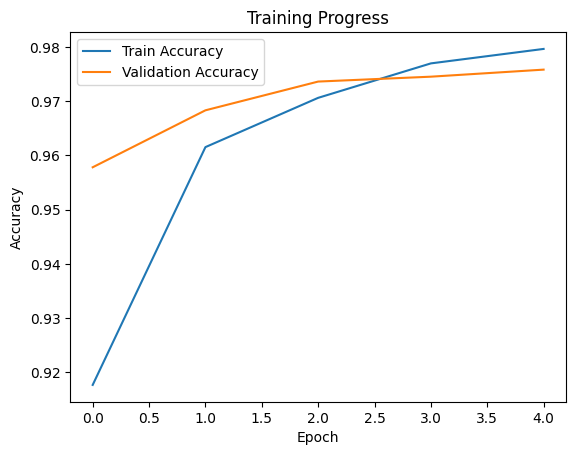

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicted digit: 7


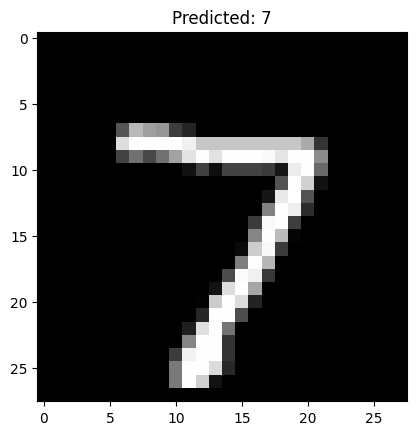

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(10, activation='softmax')
])


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

# Print the final training and validation accuracies
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")


test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f" Test accuracy: {test_acc:.4f}")


plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training Progress')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


import numpy as np
sample = np.expand_dims(x_test[0], axis=0)
prediction = model.predict(sample)
print("Predicted digit:", prediction.argmax())
plt.imshow(x_test[0], cmap='gray')
plt.title(f"Predicted: {prediction.argmax()}")
plt.show()



Downloaded file, image shape: (507, 415)
Image shape is (507, 415). Reshaping image to 28x28
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step

Predicted digit: 5
Confidence: 99.58%


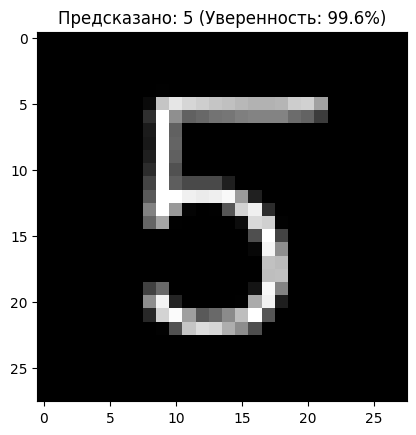

In [11]:
import cv2

image_path = "test_number5.png"

try: 
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if img is None:
        raise FileNotFoundError(f"Couldn't find file with path: {image_path}")
    
    print(f"Downloaded file, image shape: {img.shape}")

    if img.shape != (28,28):
        print(f"Image shape is {img.shape}. Reshaping image to 28x28")
        img_proceed = cv2.resize(img, (28, 28), interpolation=cv2.INTER_AREA)
    else:
        img_proceed = img

    img_normalized = img_proceed / 255.0
    img_for_prediction = np.expand_dims(img_normalized, axis=0)
    prediction = model.predict(img_for_prediction)

    predicted_digit = prediction.argmax()
    confidence = prediction[0][predicted_digit] * 100
    print(f"\nPredicted digit: {predicted_digit}")
    print(f"Confidence: {confidence:.2f}%")

    plt.imshow(img_normalized, cmap='gray')
    plt.title(f"Предсказано: {predicted_digit} (Уверенность: {confidence:.1f}%)")
    plt.show()

except FileNotFoundError as e:
    print(f"Error: {e}")
    print("Make sure file path is correct.")
except Exception as e:
    print(f"An error occurred while processing the image or making a prediction: {e}")